DATASET=https://www.kaggle.com/datasets/aungpyaeap/fish-market

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
fish=pd.read_csv("E:\\Data science\\python\\New folder\\Fish.csv")
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# TASK IS TO PREDICT WEIGHT.

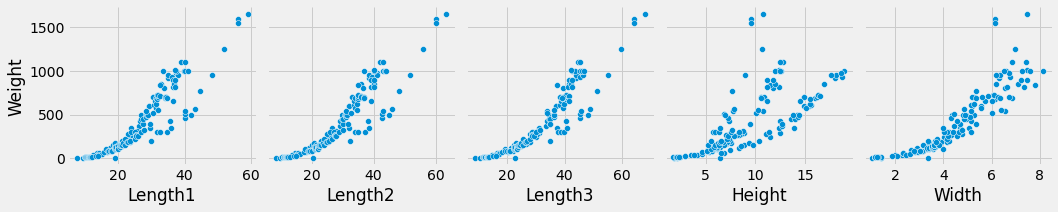

In [3]:
sns.pairplot(fish,x_vars=['Length1','Length2','Length3','Height','Width'],y_vars='Weight',height=3,kind='scatter')

In [4]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<AxesSubplot:>

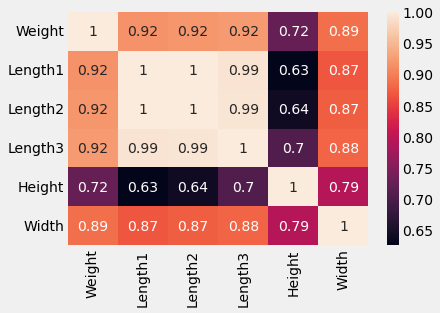

In [6]:
sns.heatmap(fish.corr(),annot=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
fish['Species'] = encoder.fit_transform(fish['Species'])

In [9]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int32  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 8.2 KB


In [11]:
df0=fish[fish['Species']==0]

In [12]:
df0.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [13]:
df1=fish[fish['Species']==1]
df2=fish[fish['Species']==2]
df3=fish[fish['Species']==3]
df4=fish[fish['Species']==4]
df5=fish[fish['Species']==5]
df6=fish[fish['Species']==6]

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 61 to 71
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  11 non-null     int32  
 1   Weight   11 non-null     float64
 2   Length1  11 non-null     float64
 3   Length2  11 non-null     float64
 4   Length3  11 non-null     float64
 5   Height   11 non-null     float64
 6   Width    11 non-null     float64
dtypes: float64(6), int32(1)
memory usage: 660.0 bytes


<AxesSubplot:xlabel='Height', ylabel='Width'>

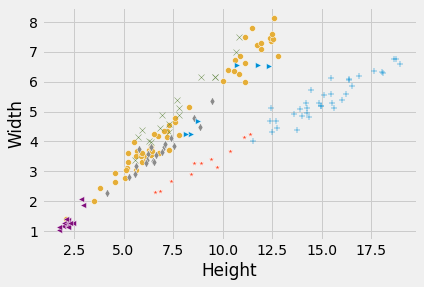

In [15]:
sns.scatterplot(data=df0, x='Height', y='Width',marker='+')
sns.scatterplot(data=df1, x='Height', y='Width',marker='*')
sns.scatterplot(data=df2, x='Height', y='Width',marker='o')
sns.scatterplot(data=df3, x='Height', y='Width',marker='x')
sns.scatterplot(data=df4, x='Height', y='Width',marker='d')
sns.scatterplot(data=df5, x='Height', y='Width',marker='<')
sns.scatterplot(data=df6, x='Height', y='Width',marker='>')

In [16]:
x=fish.drop(['Species','Weight'],axis=1)

In [17]:
y=fish.Weight

In [18]:
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x_scale = st.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scale, y, train_size=0.7 ,random_state=80)

In [20]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
print(lr.intercept_)
print(lr.coef_)

400.4996155657643
[ 703.90042537 -447.08038016   -8.10885276   58.67121357   58.40095609]


In [22]:
# Making predictions on the testing set
Y_pred = lr.predict(X_test)

In [23]:
weight_predicted = lr.predict([[25.8,25.4,30.0,11.5200,4.0200]])
weight_predicted

array([7872.68757494])

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
metrics.mean_absolute_error(Y_test,Y_pred)

95.57646089512077

In [26]:
metrics.mean_squared_error(Y_test,Y_pred)

15852.005114360009

In [27]:
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

125.9047461947325

In [28]:
metrics.r2_score(Y_test,Y_pred)

0.837675412561239

In [29]:
lr.score(X_test, Y_test)

0.837675412561239

Text(0, 0.5, 'Weight')

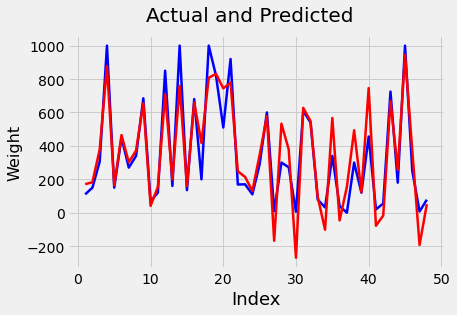

In [30]:
import matplotlib.pyplot as plt
c = [i for i in range(1,49)]         # generating index 
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Weight', fontsize=16)                   

Text(0, 0.5, 'ytest-ypred')

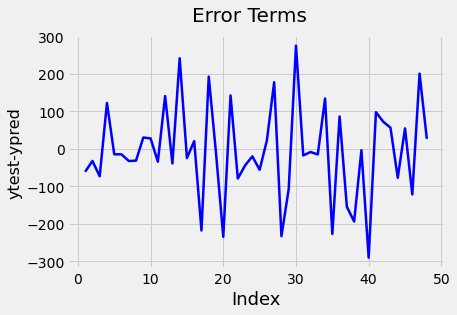

In [31]:
# Error terms
c = [i for i in range(1,49,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)    